# Iris - SVM Classification
Submitted by: Anthony Aromin

## Initial Setup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

%matplotlib inline

In [3]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df['target'] = iris_data.target
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
df.columns = [
    'sepal_length',
    'sepal_width',
    'petal_length',
    'petal_width',
    'class'
]
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['class'] = df['class'].apply(lambda x: iris_data.target_names[x])

df['class'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: class, dtype: int64

In [7]:
df.drop(
    df[df['class'] == 'setosa'].index,
    inplace=True
)
df.reset_index(inplace=True)
df['class'].value_counts()

versicolor    50
virginica     50
Name: class, dtype: int64

In [8]:
x = df.drop('class', axis=1)
y = df['class']

print(x.shape)
print(y.shape)

(100, 5)
(100,)


In [9]:
one_hot = pd.get_dummies(y)
one_hot.sum()

versicolor    50
virginica     50
dtype: int64

In [10]:
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(x)

In [11]:
from sklearn.decomposition import PCA

pca = PCA(2)
principal_components = pca.fit_transform(x)

In [12]:
principal_df = pd.DataFrame(
    data=principal_components,
    columns=[
        'principal component 1',
        'principal component 2'
    ]
)

principal_df.head(5)

,principal component 1,principal component 2
0,0.245608,2.318008
1,0.647564,1.918124
2,0.159888,1.984819
3,2.802768,-0.104763
4,0.933222,1.193620


In [13]:
final_df = pd.concat([principal_df, y], axis=1)
final_df.head(5)

,principal component 1,principal component 2,class
0,0.245608,2.318008,versicolor
1,0.647564,1.918124,versicolor
2,0.159888,1.984819,versicolor
3,2.802768,-0.104763,versicolor
4,0.933222,1.193620,versicolor


## Training

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [15]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [16]:
y_predict = svc.predict(x_test)

## Testing

In [17]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_test, y_predict)
print(matrix)

[[ 9  0]
 [ 0 11]]


In [18]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)
print(report)

              precision    recall  f1-score   support

  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [20]:
final_df.iloc[1]

principal component 1      0.647564
principal component 2      1.918124
class                    versicolor
Name: 1, dtype: object

## Visualization

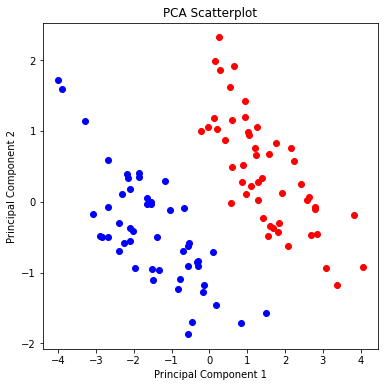

In [23]:
plt.figure(figsize=(6, 6))
plt.title('PCA Scatterplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

for i in range(100):
    row = final_df.iloc[i]
    x_plt = row['principal component 1']
    y_plt = row['principal component 2']
    color = 'r' if row['class'] == 'versicolor' else 'b'

    plt.scatter(x_plt, y_plt, c=color)

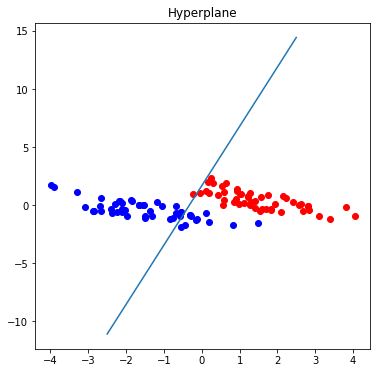

In [29]:
plt.figure(figsize=(6, 6))
plt.title('Hyperplane')

for i in range(100):
    row = final_df.iloc[i]
    x_plt = row['principal component 1']
    y_plt = row['principal component 2']
    color = 'r' if row['class'] == 'versicolor' else 'b'

    plt.scatter(x_plt, y_plt, c=color)

# Create the hyperplane
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (svc.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)